In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [23]:
# load order parameter
save_array = np.load('../order_parameter/results/Order_parameter_64.npz')
X1 = save_array['X']
Y1 = save_array['Y']
MFv64 = save_array['Mfv64']

In [24]:
plt.rcParams['font.size'] = 12

In [25]:
step = 1
N = 64

folder = f'sunspot_{step}step_results_N{N}'

result_file = f'{folder}/result.csv'

df = pd.read_csv(result_file)

for column in ['train_rmse', 'test_rmse', 'train_nrmse', 'test_nrmse']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outlier_min = q1 - 1.5 * iqr
    outlier_max = q3 + 1.5 * iqr
    df = df[(outlier_min <= df[column]) & (df[column] <= outlier_max)]

df

,d_bond,std,rho,seed,parameter_size,train_rmse,test_rmse,train_nrmse,test_nrmse
0,10,0.01,1.0,0,64,0.004893,0.006101,0.081034,0.086865
1,10,0.02,1.0,0,64,0.004766,0.006019,0.078939,0.085699
2,10,0.03,1.0,0,64,0.004847,0.006041,0.080274,0.086016
3,10,0.04,1.0,0,64,0.004746,0.005957,0.078598,0.084812
4,10,0.05,1.0,0,64,0.004853,0.006070,0.080376,0.086424
...,...,...,...,...,...,...,...,...,...
2093,100,0.17,1.0,9,64,0.065413,0.076346,1.083334,1.087003
2094,100,0.18,1.0,9,64,0.067432,0.078893,1.116763,1.123256
2095,100,0.19,1.0,9,64,0.067442,0.079111,1.116937,1.126368
2096,100,0.20,1.0,9,64,0.067178,0.077381,1.112567,1.101738


In [26]:
df_mean = df.groupby(['d_bond', 'std', 'rho', 'parameter_size']).mean().reset_index()
df_mean

,d_bond,std,rho,parameter_size,seed,train_rmse,test_rmse,train_nrmse,test_nrmse
0,10,0.01,1.0,64,4.5,0.004859,0.006075,0.080465,0.086501
1,10,0.02,1.0,64,4.5,0.004880,0.006094,0.080816,0.086764
2,10,0.03,1.0,64,4.5,0.004773,0.006019,0.079045,0.085702
3,10,0.04,1.0,64,4.5,0.004794,0.005977,0.079387,0.085103
4,10,0.05,1.0,64,4.5,0.005388,0.006288,0.089237,0.089527
...,...,...,...,...,...,...,...,...,...
205,100,0.17,1.0,64,4.5,0.067311,0.078241,1.114757,1.113982
206,100,0.18,1.0,64,4.5,0.068159,0.078910,1.128800,1.123500
207,100,0.19,1.0,64,4.5,0.067594,0.078733,1.119445,1.120983
208,100,0.20,1.0,64,4.5,0.066888,0.078434,1.107764,1.116724


In [27]:
df_mean.iloc[df_mean['test_rmse'].idxmin()]

d_bond            90.000000
std                0.020000
rho                1.000000
parameter_size    64.000000
seed               4.500000
train_rmse         0.004657
test_rmse          0.005912
train_nrmse        0.077119
test_nrmse         0.084175
Name: 169, dtype: float64

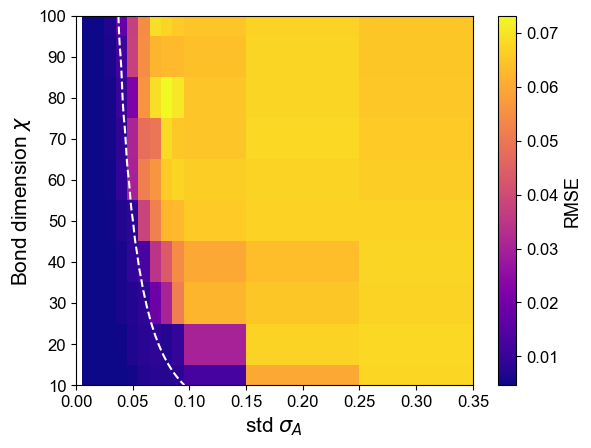

In [ ]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = df_mean[(df_mean['d_bond'] == bond) & df_mean['std'].isin(stds)].sort_values('std')['train_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)
# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'{folder}/train_rmse.pdf', bbox_inches='tight')

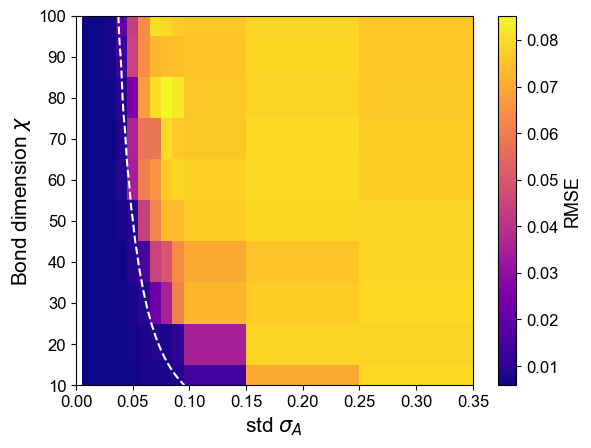

In [ ]:
bonds=np.array([i for i in range(10,101,10)])
X=np.zeros((len(bonds),12))
Y=np.zeros((len(bonds),12))
Z=np.zeros((len(bonds),12))
stds=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for i in range(len(bonds)):
    bond=bonds[i]
    rmses = df_mean[(df_mean['d_bond'] == bond) & df_mean['std'].isin(stds)].sort_values('std')['test_rmse']
    X[i,:]=(np.array(stds))
    Y[i,:]=bond
    Z[i,:]=rmses[:]

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z,cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('RMSE', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='w')

plt.ylim([10,100])
plt.xlim([0,0.35])

plt.savefig(f'{folder}/test_rmse.pdf', bbox_inches='tight')
plt.savefig(f'{folder}/figure_6_d.pdf', bbox_inches='tight')

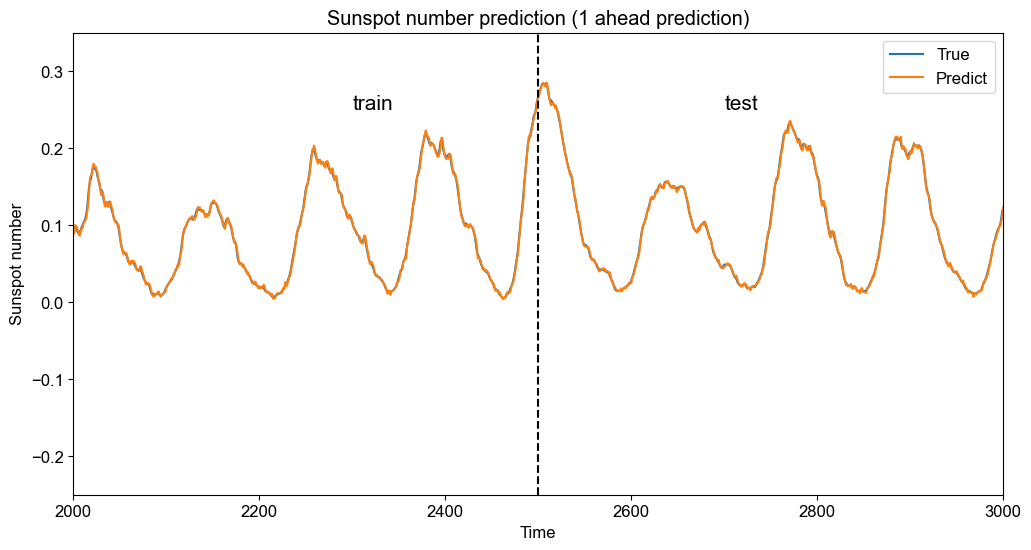

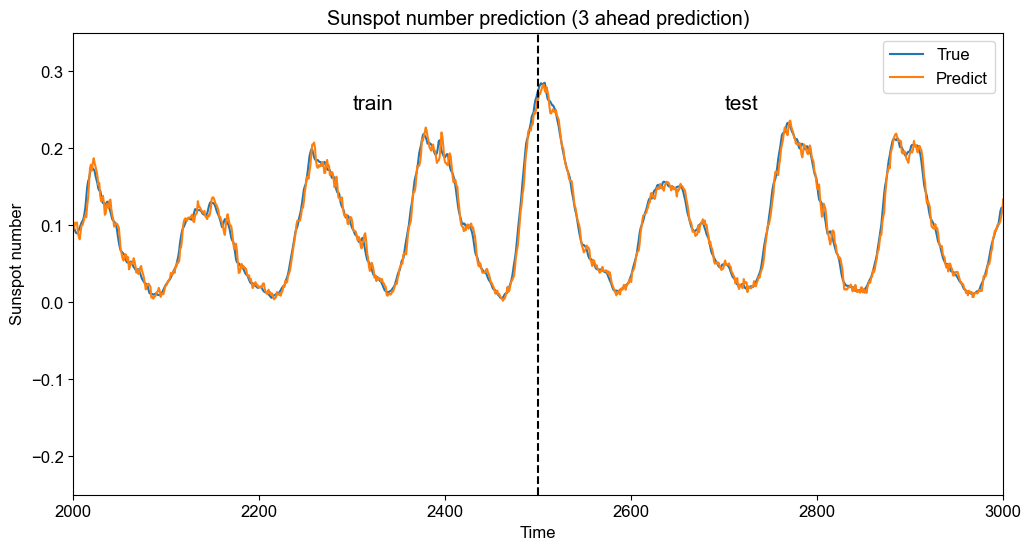

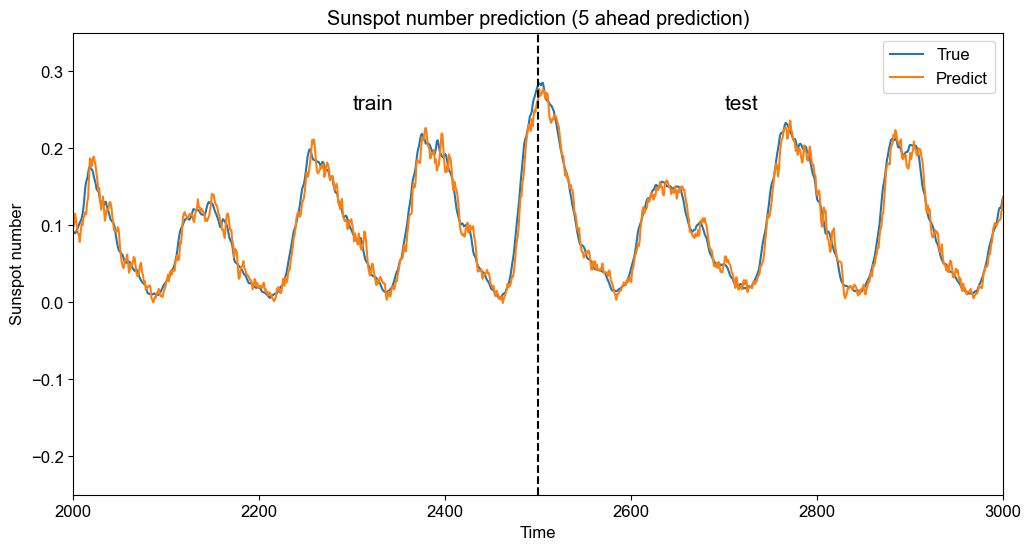

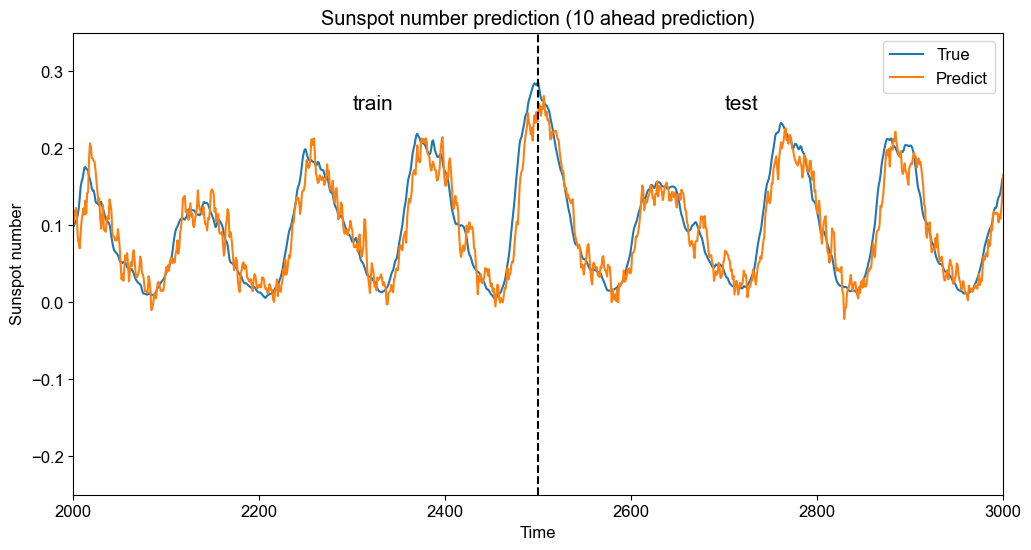

In [30]:
# Edge of chaos

for step in [1, 3, 5, 10]:

    d_bond = 80
    std = 0.03
    rho = 1.0
    parameter_size = 64
    seed = 0

    T_train = 2500

    folder = f'sunspot_{step}step_results_N{N}'
    pred_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{parameter_size}_{seed}.npy'

    Y_pred = np.load(pred_path)

    Y = Y_pred[:, 0]
    pred = Y_pred[:, 1]

    plt.figure(figsize=(12, 6))
    plt.plot(Y, label='True')
    plt.plot(pred, label='Predict')

    plt.axvline(x=T_train, color='black', linestyle='--')

    plt.text(T_train-200, 0.25, 'train', fontsize=15)
    plt.text(T_train+200, 0.25, 'test', fontsize=15)


    plt.xlabel('Time')
    plt.ylabel('Sunspot number')
    plt.title(f'Sunspot number prediction ({step} ahead prediction)')
    plt.xlim(T_train-500, T_train+500)
    plt.ylim(-0.25, 0.35)
    plt.legend()


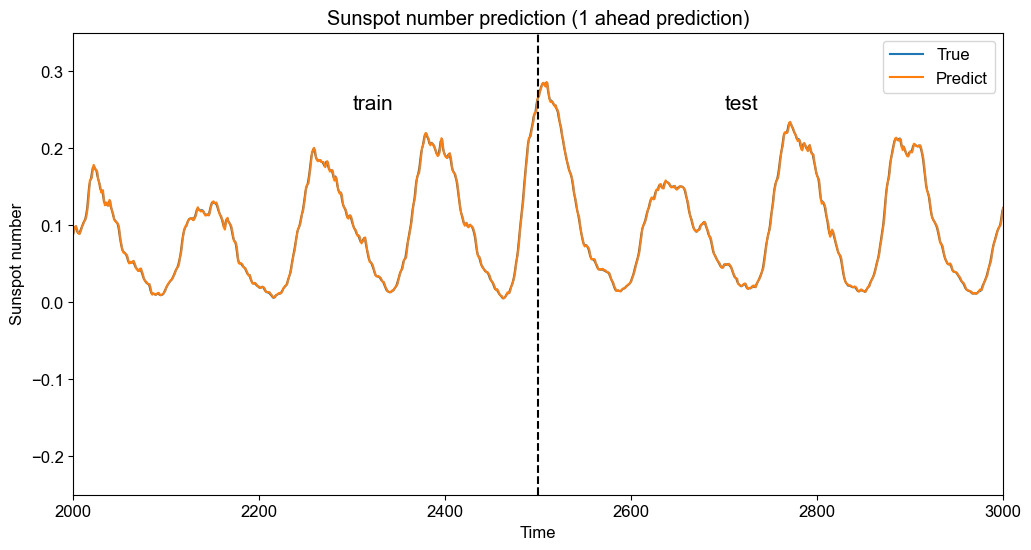

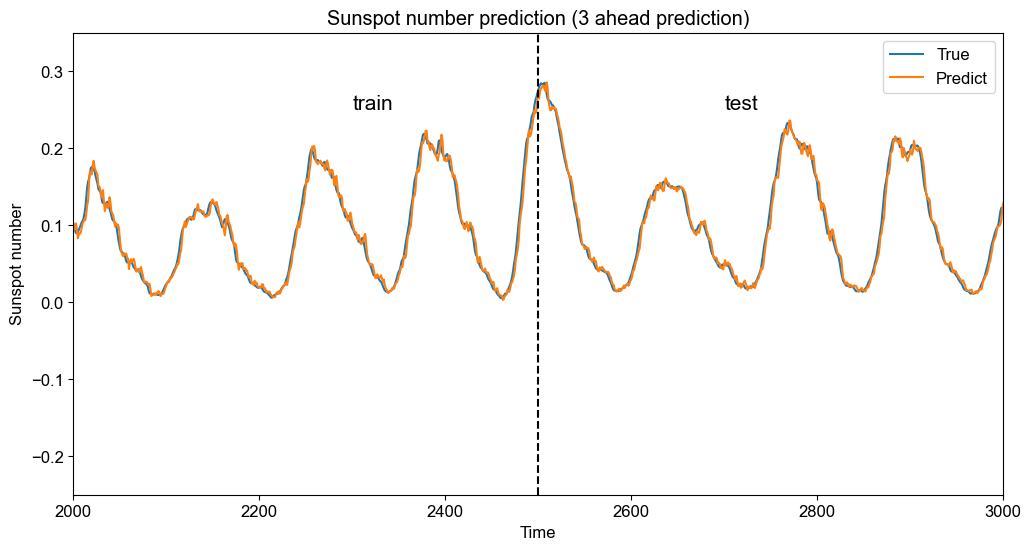

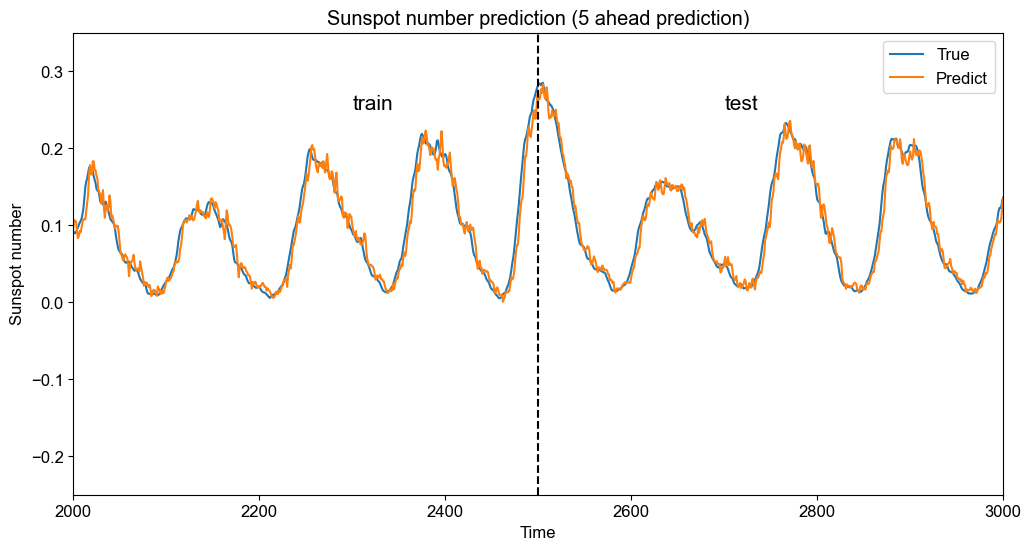

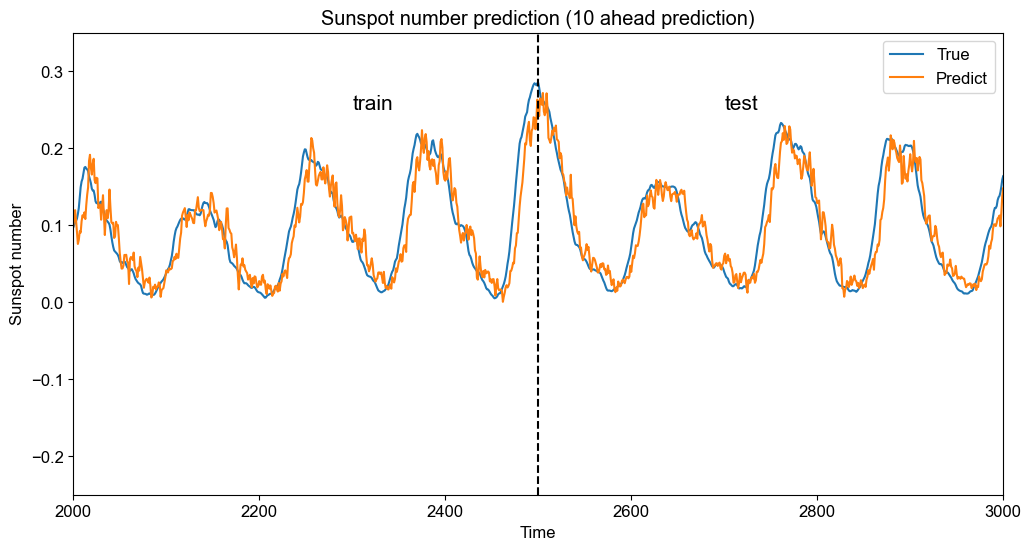

In [31]:
# stable

for step in [1, 3, 5, 10]:

    d_bond = 80
    std = 0.01
    rho = 1.0
    parameter_size = 64
    seed = 0

    T_train = 2500

    folder = f'sunspot_{step}step_results_N{N}'
    pred_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{parameter_size}_{seed}.npy'

    Y_pred = np.load(pred_path)

    Y = Y_pred[:, 0]
    pred = Y_pred[:, 1]

    plt.figure(figsize=(12, 6))
    plt.plot(Y, label='True')
    plt.plot(pred, label='Predict')

    plt.axvline(x=T_train, color='black', linestyle='--')

    plt.text(T_train-200, 0.25, 'train', fontsize=15)
    plt.text(T_train+200, 0.25, 'test', fontsize=15)


    plt.xlabel('Time')
    plt.ylabel('Sunspot number')
    plt.title(f'Sunspot number prediction ({step} ahead prediction)')
    plt.xlim(T_train-500, T_train+500)
    plt.ylim(-0.25, 0.35)
    plt.legend()


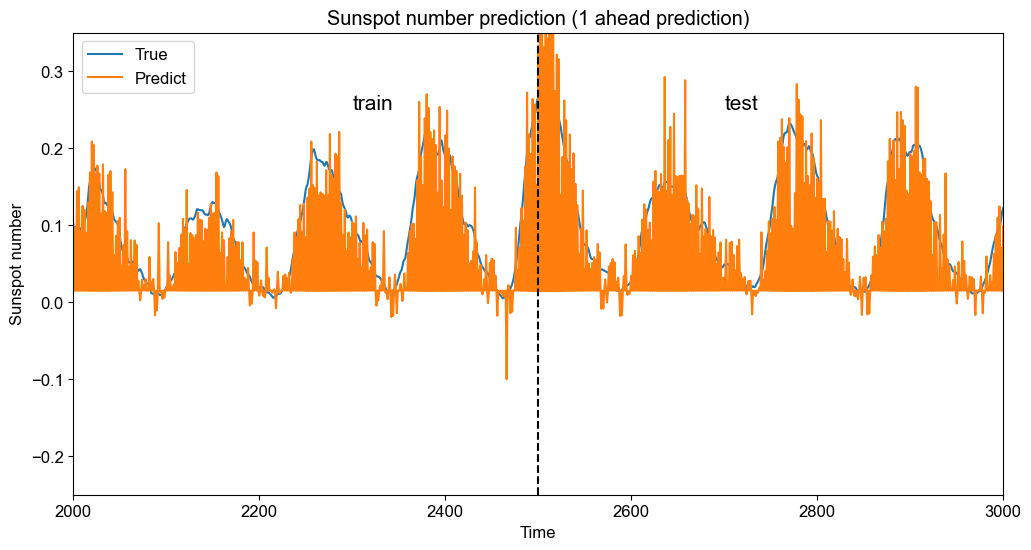

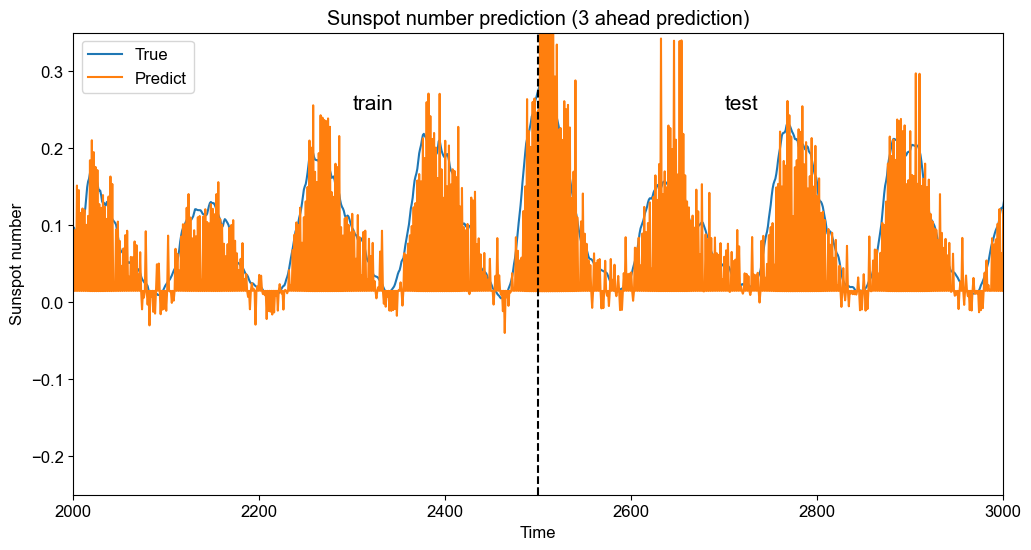

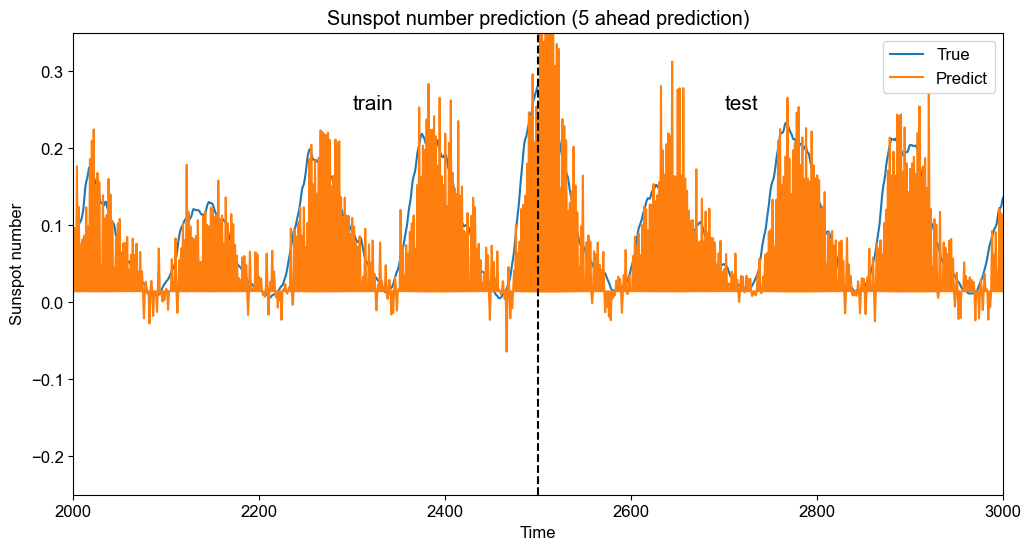

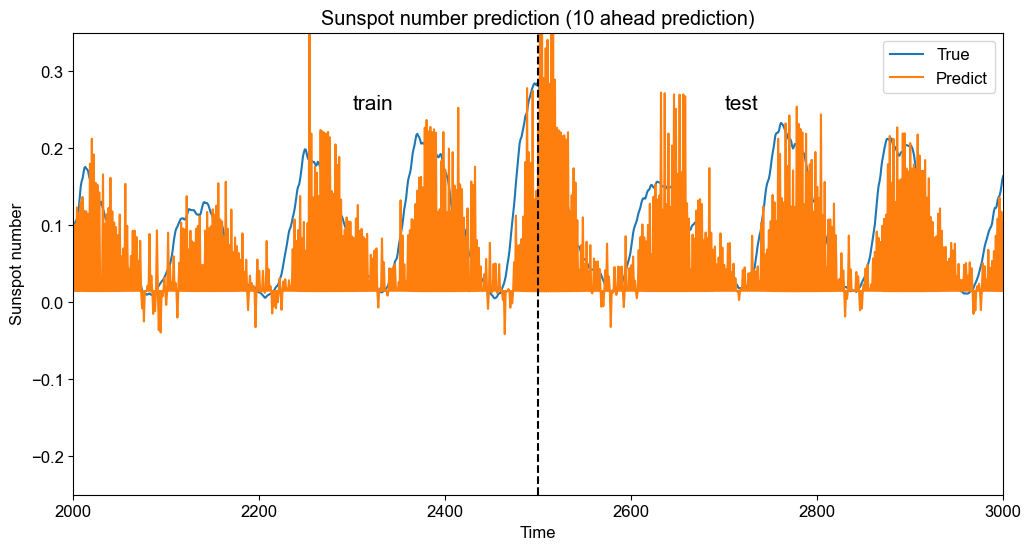

In [32]:
# chaos
for step in [1, 3, 5, 10]:

    d_bond = 80
    std = 0.05
    rho = 1.0
    parameter_size = 64
    seed = 0

    T_train = 2500

    folder = f'sunspot_{step}step_results_N{N}'
    pred_path = f'{folder}/train_test_Y_predict/{d_bond}_{std}_{rho}_{parameter_size}_{seed}.npy'

    Y_pred = np.load(pred_path)

    Y = Y_pred[:, 0]
    pred = Y_pred[:, 1]

    plt.figure(figsize=(12, 6))
    plt.plot(Y, label='True')
    plt.plot(pred, label='Predict')

    plt.axvline(x=T_train, color='black', linestyle='--')

    plt.text(T_train-200, 0.25, 'train', fontsize=15)
    plt.text(T_train+200, 0.25, 'test', fontsize=15)


    plt.xlabel('Time')
    plt.ylabel('Sunspot number')
    plt.title(f'Sunspot number prediction ({step} ahead prediction)')
    plt.xlim(T_train-500, T_train+500)
    plt.ylim(-0.25, 0.35)
    plt.legend()


## compare with ESN

In [33]:
def calculate_RMSE(true_data, predict_data):
    return np.sqrt(np.mean((true_data - predict_data) ** 2))

In [34]:
N_x = 64
step = 1
folder = f'sunspot_{step}step_results_N{N_x}'


with open(f'{folder}/rmse_esn.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse'])
    for seed in range(10):
        results = np.load(f'{folder}/esn_prediction_data/optimized_esn_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        writer.writerow([seed, test_rmse])

In [35]:
N_x = 64
folder = f'sunspot_{step}step_results_N{N_x}'

with open(f'{folder}/rmse_mps.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['seed', 'test_rmse'])
    for seed in range(10):
        results = np.load(f'{folder}/esn_prediction_data/optimized_mps_{N_x}_{seed}.npz')

        train_D = results['train_D']
        test_D = results['test_D']
        test_Y = results['test_Y']

        test_rmse = calculate_RMSE(test_D, test_Y)
        writer.writerow([seed, test_rmse])

0.006235715555863644

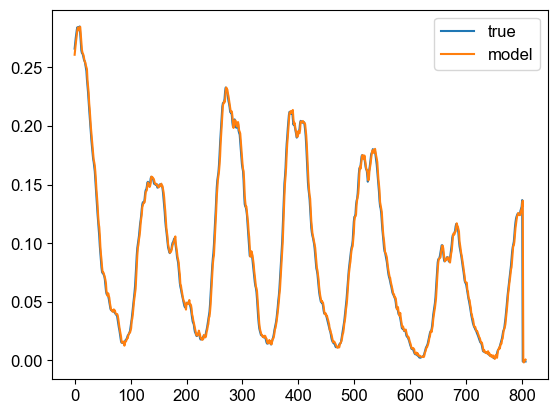

In [36]:
plt.plot(test_D, label= 'true')
plt.plot(test_Y, label = 'model')
plt.legend()
test_rmse = calculate_RMSE(test_D, test_Y)
test_rmse

In [37]:
df_esn = pd.read_csv(f'{folder}/rmse_esn.csv')
df_mps = pd.read_csv(f'{folder}/rmse_mps.csv')

In [38]:
import pickle
with open(f'{folder}/optuna/best_params_mps_{N_x}.pickle', 'rb') as file:
    result_dict = pickle.load(file)

std = round(result_dict['std'], 4)
d_bond = result_dict['d_bond']

In [39]:
test_rmse_esn = df_esn['test_rmse']
test_rmse_mps = df_mps['test_rmse']

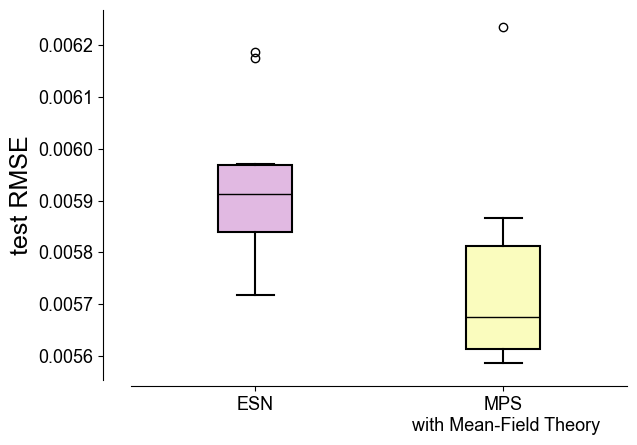

In [ ]:
boxplot_elements = plt.boxplot([test_rmse_esn, test_rmse_mps],
            labels=['ESN', f'MPS\n with Mean-Field Theory'],
            patch_artist=True,
            widths=0.3,
            boxprops={'linewidth': 1.5},
            medianprops={'color': 'black'},
            whiskerprops={'linewidth': 1.5},
            capprops={'linewidth': 1.5})
colors = ['#9c179e4c', '#f1f5254c']
for patch, color in zip(boxplot_elements['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('test RMSE', fontsize=18)

plt.tick_params(labelsize=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig(f'{folder}/boxplot-test-rmse.pdf', bbox_inches='tight')
plt.savefig(f'{folder}/figure_supp_9_2_b.pdf', bbox_inches='tight')

In [41]:
from scipy.stats import ranksums
stat, p_value = ranksums(test_rmse_esn, test_rmse_mps, alternative='greater')
print(f"Observed statistic: {stat}")
print(f"P-value: {p_value}")

Observed statistic: 2.4945655218609
P-value: 0.006305572049656974


In [42]:
import numpy as np
from scipy.stats import permutation_test


def statistic(A, B):
    return np.mean(A) - np.mean(B)

result = permutation_test((test_rmse_esn, test_rmse_mps), statistic, alternative='greater', n_resamples=10000, random_state=42)

print(f"Observed statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")


Observed statistic: 0.00018369693891634887
P-value: 0.0183981601839816
